# Data loading

Este JN apresenta a receita para baixar os dadasets usados na disciplina ICCD - IME - USP.

In [8]:
!pip install git+https://github.com/rmcesarjr/iccd.git


  Cloning https://github.com/rmcesarjr/iccd.git to /tmp/pip-req-build-v6i4ct0w
  Running command git clone --filter=blob:none --quiet https://github.com/rmcesarjr/iccd.git /tmp/pip-req-build-v6i4ct0w
  Resolved https://github.com/rmcesarjr/iccd.git to commit 54aab418759981d4bb1346cbbaddab5baf4c792e
  Preparing metadata (setup.py) ... done


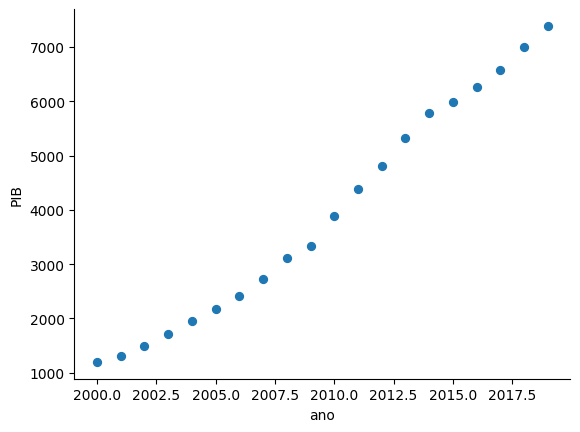

In [ ]:
from matplotlib import pyplot as plt
import iccd

def main():
  df = iccd.dataload('pib')
  df.head()
  df.plot(kind='scatter', x='ano', y='PIB', s=32)
  plt.gca().spines[['top', 'right',]].set_visible(False)

main()

In [ ]:
from matplotlib import pyplot as plt
import iccd

def main():
  df = iccd.dataload('cidades')
  df.head()
  print(df)

main()

                     Cidade  População
0                 São Paulo   12396372
1            Rio de Janeiro    6775561
2                  Brasília    3055149
3                  Salvador    2886698
4                 Fortaleza    2669342
5            Belo Horizonte    2530701
6                    Manaus    2256230
7                  Curitiba    1963726
8                    Recife    1653461
9                   Goiânia    1555626
10                    Belém    1499641
11             Porto Alegre    1492530
12                Guarulhos    1392128
13                 Campinas    1213792
14                 São Luís    1118721
15              São Gonçalo    1091737
16                   Maceió    1029129
17          Duque de Caxias    1006281
18                    Natal     998066
19                 Teresina     868075
20              Nova Iguaçu     862225
21             Campo Grande     897938
22    São Bernardo do Campo     844483
23              João Pessoa     833932
24              Santo And


Tabela de histogramas para IMC:

         IMC  Frequência
[15.0, 16.0)           2
[16.0, 17.0)           2
[17.0, 18.0)           1
[18.0, 19.0)           3
[19.0, 20.0)           8
[20.0, 21.0)           4
[21.0, 22.0)           9
[22.0, 23.0)           9
[23.0, 24.0)           7
[24.0, 25.0)           9
[25.0, 26.0)           8
[26.0, 27.0)           8
[27.0, 28.0)           5
[28.0, 29.0)           5
[29.0, 30.0)           5
[30.0, 31.0)           1
[31.0, 32.0)           3
[32.0, 33.0)           1
[33.0, 34.0)           2
[34.0, 35.0)           0
[35.0, 36.0)           1
[36.0, 37.0)           2
[37.0, 38.0)           1
[38.0, 39.0)           1
[39.0, 40.0)           2
[40.0, 41.0)           0
[41.0, 42.0)           0
[42.0, 43.0)           1
[43.0, 44.0)           0


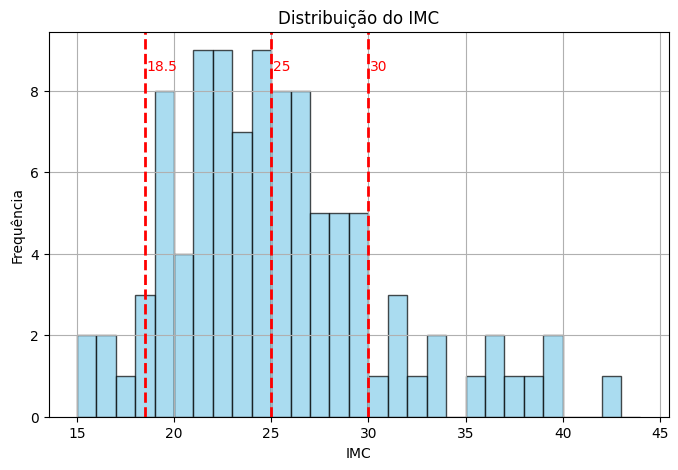

In [7]:
import iccd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # necessário para o gráfico 3D


def classifica_imc(imc):
    if imc < 18.5:
        return "Abaixo do peso"
    elif imc < 25:
        return "Normal"
    elif imc < 30:
        return "Sobrepeso"
    else:
        return "Obesidade"


def tabela_histograma(df, coluna, bins):
    """Gera e imprime uma tabela de faixas com contagem"""
    counts, bin_edges = np.histogram(df[coluna], bins=bins)
    faixas = [f"[{bin_edges[i]:.1f}, {bin_edges[i+1]:.1f})" for i in range(len(bin_edges)-1)]
    tabela = pd.DataFrame({coluna: faixas, "Frequência": counts})
    print(f"\nTabela de histogramas para {coluna}:\n")
    print(tabela.to_string(index=False))


def plot_histograma_imc(df, coluna, cortes, titulo=""):
    """Plota histograma do IMC com linhas verticais nos pontos de corte"""
    bins = np.arange(15, 45, 1)
    plt.figure(figsize=(8, 5))
    plt.hist(df[coluna], bins=bins, edgecolor='black', alpha=0.7, color='skyblue')

    for corte in cortes:
        plt.axvline(x=corte, color='red', linestyle='--', linewidth=2)
        plt.text(corte + 0.1, plt.ylim()[1]*0.9, f"{corte}", color='red')

    plt.title(titulo)
    plt.xlabel("IMC")
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.show()


def main():
    df = iccd.dataload('peso_altura')

    # Calcular IMC e classificar
    df["IMC"] = df["Peso (kg)"] / df["Altura (m)"]**2
    df["Categoria"] = df["IMC"].apply(classifica_imc)

    cores = {
        "Abaixo do peso": "blue",
        "Normal": "green",
        "Sobrepeso": "orange",
        "Obesidade": "red"
    }
    df["Cor"] = df["Categoria"].map(cores)

    # Histograma do IMC
    cortes_imc = [18.5, 25, 30]
    tabela_histograma(df, "IMC", bins=np.arange(15, 45, 1))
    plot_histograma_imc(df, "IMC", cortes=cortes_imc, titulo="Distribuição do IMC")

main()
